# 3. Machine Learning for Classification
We'll use logistic regression to predict churn

## 3.1 Churn prediction project
- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


# 3.2 Data preparation
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [5]:
!wget $data -O data-week-3.csv

--2025-10-13 03:53:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.04s   

2025-10-13 03:53:56 (24.4 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [6]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
# why is total charges an object and not a number?
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [11]:
# errors='coerce' 
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [15]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [18]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# 3.3 Setting up the validation framework
- perform the train/validation/test split wtih scikitlearn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [22]:
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
len(df_train), len(df_val), len(df_test),

(4225, 1409, 1409)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 Exploratory Data Analysis

In [28]:
df_full_train = df_full_train.reset_index(drop=True)

In [29]:
# are there missing values? ...uhuh
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [31]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [32]:
# churn rate can be deteremined easily with normalize=True
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [33]:
# with binary classifies the mean will always produce the rate of 1s. 
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [34]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [35]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [36]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [38]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [39]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

#### Churn Rate

In [40]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [41]:
# chrun rate for female
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()

In [42]:
# chrun rate for male
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [43]:
churn_female, churn_male

(np.float64(0.27682403433476394), np.float64(0.2632135306553911))

In [44]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [45]:
# how many have partners vs  not
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [46]:
# churn rate for partnered
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [47]:
# churn rate for not partnered
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [48]:
# suggest the partner variable is more important for predicting churn.
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

#### Risk Ratio

In [49]:
# divide the group churn / global churn rate. If > 1 more likely to churn and vis versa
no_partner_risk = churn_no_partner / global_churn
partner_risk = churn_partner / global_churn
f'More likley to churn: {no_partner_risk}', f'Less likely to churn: {partner_risk}'

('More likley to churn: 1.2216593879412643',
 'Less likely to churn: 0.7594724924338315')

In [50]:
# we need to take this sql query and implement it in pandas
"""
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
"""

'\nSELECT\n    gender,\n    AVG(churn),\n    AVG(churn) - global_churn AS diff,\n    AVG(churn) / global_churn AS risk\nFROM\n    data\nGROUP BY\n    gender;\n'

In [51]:
# us agg to pass a list of different aggregations
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [52]:
from IPython.display import display

In [53]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    
    display(df_group)
    print()
    print()


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [54]:
from sklearn.metrics import mutual_info_score

In [55]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [56]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [57]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

#### Finding: 
contract is more important than partner and partner more important than gender

In [58]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [59]:
# you can use .appy() apply whole function to dataframe columns.
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature importance: Correlation
How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- Measures linear correlation between two sets of numerical data

In [60]:
df_full_train.tenure.max()

np.int64(72)

In [61]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [62]:
# churn rate for less than 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [63]:
# churn rate for people with more than 2 months but less than 1 year
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [64]:
# churn rate for people with more than 2 months but less than 1 year
df_full_train[(df_full_train.tenure > 12)].churn.mean()

np.float64(0.17634908339788277)

In [65]:
# montlh charges up to $20
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [66]:
# montlh charges over $20 up to $50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [67]:
# montlh charges over $50
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

In [68]:
# Tenure is negativly correlated with churn. Monthly charges are positive correlations with churn.

In [69]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features automatically

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [72]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [73]:
# all the zeros will cause a sparse matrix to be used and that's not what we want rn.
dv = DictVectorizer(sparse=False)

In [74]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [75]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [76]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [77]:
# don't fit on the validation data set.
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [79]:
z = np.linspace(-7, 7, 51)

In [80]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

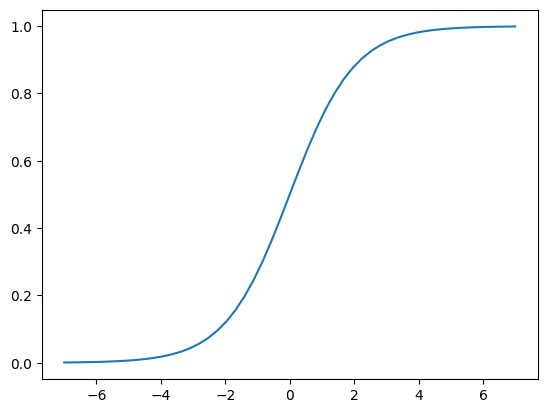

In [81]:
plt.plot(z, sigmoid(z))

In [82]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [83]:
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

# 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [84]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [89]:
model.intercept_[0]

np.float64(-0.1109287445794238)

In [88]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [90]:
# Hard predictions bc we already have the exact lable
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [92]:
# Soft predictions because it's based on the probability. Prob Negative | Prob Positive
model.predict_proba(X_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

In [93]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.08911312, 0.66871172, 0.63770441, ..., 0.51223683, 0.03006521,
       0.7028991 ], shape=(4225,))

In [95]:
churn_decision = (y_pred >= 0.5)

In [97]:
churn_decision

array([False,  True,  True, ...,  True, False,  True], shape=(4225,))

In [98]:
# these ids are 50% likely to churn
df_val[churn_decision].customerid

1       1960-uycnn
2       9250-wypll
3       6786-obwqr
6       1452-voqch
7       6653-cbbom
           ...    
4208    5712-ptiww
4211    6128-czomy
4216    7734-dboai
4222    3703-vavcl
4224    1704-nrwye
Name: customerid, Length: 940, dtype: object

### How accurate was our model? Accuracy.

In [99]:
(y_val == churn_decision).mean()

np.float64(0.805207100591716)

In [103]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [106]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [107]:
df_pred

,probability,prediction,actual,correct
0,0.089113,0,0,True
1,0.668712,1,0,False
2,0.637704,1,1,True
3,0.691875,1,0,False
4,0.038231,0,0,True
...,...,...,...,...
4220,0.110719,0,0,True
4221,0.343297,0,0,True
4222,0.512237,1,1,True
4223,0.030065,0,0,True


In [109]:
# model is 81% accurate
df_pred.correct.mean()

np.float64(0.805207100591716)

# 3.11 Model interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [110]:
a = [1, 2, 3, 4]
b = 'abcd'

In [111]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [114]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

In [115]:
small = ['contract', 'tenure', 'monthlycharges']

In [116]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [119]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [120]:
dicts_train_small = df_train[small].to_dict(orient='records')

In [121]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [122]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [124]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [126]:
X_train_small = dv_small.transform(dicts_train_small)

In [127]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [138]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [139]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [133]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [140]:
-2.47 + .97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [141]:
# underscore is a magic variable. it's the output for the previous cell
sigmoid(_)

np.float64(0.41824062315816374)

# 3.12 Using the model

In [143]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [144]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [147]:
y_full_train = df_full_train.churn.values

In [148]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [155]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [150]:
X_test = dv.transform(dicts_test)

In [151]:
y_pred = model.predict_proba(X_test)[:, 1]

In [152]:
churn_decision = (y_pred >= 0.5)

In [153]:
(churn_decision == y_test).mean()


np.float64(0.8061538461538461)

In [154]:
y_test

array([0, 0, 1, ..., 1, 0, 1], shape=(4225,))

In [156]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 9,
 'monthlycharges': 80.85,
 'totalcharges': 751.65}

In [157]:
X_small = dv.transform([customer])

In [158]:
model.predict_proba(X_small)[0, 1]

np.float64(0.7281146811008093)

In [159]:
y_test[-1]

np.int64(1)

# 3.13 Summary
- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression

# 3.14 Explore more
More things

- Try to exclude least useful features

Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and - - -- `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients